# **LTFS Data Science FinHack 2**

## **Problem statement**

LTFS receives a lot of requests for its various finance offerings that include housing loan, two-wheeler loan, real estate financing and micro loans. The number of applications received is something that varies a lot with season. Going through these applications is a manual process and is tedious. Accurately forecasting the number of cases received can help with resource and manpower management resulting into quick response on applications and more efficient processing.

We have been appointed with the task of forecasting daily cases for **next 3 months for 2 different business segments** at the **country level** keeping in consideration the following major Indian festivals (inclusive but not exhaustive list): Diwali, Dussehra, Ganesh Chaturthi, Navratri, Holi etc. (We are free to use any publicly available open source external datasets). Some other examples could be:

 + Weather
 + Macroeconomic variables

we also note that the external dataset must belong to a reliable source.

## **Data Dictionary**

The train data has been provided in the following way:

 + For business segment 1, historical data has been made available at branch ID level
 + For business segment 2, historical data has been made available at State level.
 

## **Train File**

|Variable|	Definition|
|:------:|:----------:|
|application_date|Date of application|
|application_date|	Date of application|
|segment|	Business Segment (1/2)|
|branch_id|	Anonymised id for branch at which application was received|
|state|	State in which application was received (Karnataka, MP etc.)|
|zone|	Zone of state in which application was received (Central, East etc.)|
|case_count|	(Target) Number of cases/applications received|

## **Test File**

Forecasting needs to be done at country level for the dates provided in test set for each segment.

|Variable|	Definition|
|:------:|:----------:|
|id|	Unique id for each sample in test set|
|application_date|	Date of application|
| segment|	Business Segment (1/2)|

## **Evaluation**

**Evaluation Metric**

The evaluation metric for scoring the forecasts is MAPE (Mean Absolute Percentage Error) M with the formula:

$$M = \frac{100}{n}\sum_{t = 1}^{n}|\frac{A_t - F_t}{A_t}|$$
 
Where $A_t$ is the actual value and $F_t$ is the forecast value.


The Final score is calculated using $MAPE$ for both the segments using the formula:

$Final Score = 0.5*MAPE_{Segment1} + 0.5*MAPE_{Segment2}$


## **Getting started**

**Importing libraries**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss
%matplotlib inline

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

**Reading data**

In [0]:
# Setting the path
import os
path = "/content/drive/My Drive/Colab Notebooks (1)/LTFS Data Science FinHack 2"
os.chdir(path)

In [0]:
# Importing the dataset
train = pd.read_csv("./Input/train_fwYjLYX.csv")
test = pd.read_csv("./Input/test_1eLl9Yf.csv")
#holidays = pd.read_csv("./Input/holiday_list_2017_2018_2019.csv")
Sample_submission = pd.read_csv("./Input/sample_submission_IIzFVsf.csv")

## **Data Preprocessing**

In [5]:
train.head()

,application_date,segment,branch_id,state,zone,case_count
0,2017-04-01,1,1.00,WEST BENGAL,EAST,40.00
1,2017-04-03,1,1.00,WEST BENGAL,EAST,5.00
2,2017-04-04,1,1.00,WEST BENGAL,EAST,4.00
3,2017-04-05,1,1.00,WEST BENGAL,EAST,113.00
4,2017-04-07,1,1.00,WEST BENGAL,EAST,76.00


In [6]:
# Data preprocessing function
train_v2 = pd.DataFrame(train.groupby(['application_date', 'segment'])['case_count'].sum()).reset_index()
train_v2.head()

,application_date,segment,case_count
0,2017-04-01,1,299.00
1,2017-04-01,2,897.00
2,2017-04-02,2,605.00
3,2017-04-03,1,42.00
4,2017-04-03,2,2016.00


In [7]:
train_v2_segment1 = train_v2[train_v2['segment'] == 1]
train_v2_segment2 = train_v2[train_v2['segment'] == 2]

train_v2_segment1 = train_v2_segment1.drop(['segment'], axis = 1).reset_index()
train_v2_segment2 = train_v2_segment2.drop(['segment'], axis = 1).reset_index()

print("Shape of training data :", train_v2.shape)
print("Shape of training data for segment 1 :", train_v2_segment1.shape)
print("Shape of training data for segment 2 :", train_v2_segment2.shape)
print(" ")
print("Top 5 rows of training data - segment 1")
print(train_v2_segment1.head())
print(" ")
print("Top 5 rows of training data - segment 2")
print(train_v2_segment2.head())

Shape of training data : (1650, 3)
Shape of training data for segment 1 : (806, 3)
Shape of training data for segment 2 : (844, 3)
 
Top 5 rows of training data - segment 1
   index application_date  case_count
0      0       2017-04-01      299.00
1      3       2017-04-03       42.00
2      5       2017-04-04       23.00
3      7       2017-04-05     1530.00
4     10       2017-04-07     1341.00
 
Top 5 rows of training data - segment 2
   index application_date  case_count
0      1       2017-04-01      897.00
1      2       2017-04-02      605.00
2      4       2017-04-03     2016.00
3      6       2017-04-04     2245.00
4      8       2017-04-05     2415.00


In [8]:
test_v2 = test
test_segment1 = test_v2[test_v2['segment'] == 1]
test_segment2 = test_v2[test_v2['segment'] == 2]

test_segment1 = test_segment1.drop(['segment'], axis = 1).reset_index()
test_segment2 = test_segment2.drop(['segment'], axis = 1).reset_index()

print("Shape of test data :", test_v2.shape)
print("Shape of test data for segment 1 :", test_segment1.shape)
print("Shape of test data for segment 2 :", test_segment2.shape)
print(" ")
print("Top 5 rows of test data - segment 1")
print(test_segment1.head())
print(" ")
print("Top 5 rows of test data - segment 2")
print(test_segment2.head())

Shape of test data : (180, 3)
Shape of test data for segment 1 : (87, 3)
Shape of test data for segment 2 : (93, 3)
 
Top 5 rows of test data - segment 1
   index  id application_date
0      0   1       2019-07-06
1      1   2       2019-07-07
2      2   3       2019-07-08
3      3   4       2019-07-09
4      4   5       2019-07-10
 
Top 5 rows of test data - segment 2
   index  id application_date
0     87  88       2019-07-24
1     88  89       2019-07-25
2     89  90       2019-07-26
3     90  91       2019-07-27
4     91  92       2019-07-28


## **Machine Learning - Segment 1**

### **Data Preprocessing**

In [0]:
import warnings
warnings.filterwarnings("ignore")

In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0, 1))

Train_seg1_scaled = scaler.fit_transform(train_v2_segment1[['case_count']])

features_set = []
labels = []
for i in range(87, 806):
    features_set.append(Train_seg1_scaled[i-87:i, 0])
    labels.append(Train_seg1_scaled[i, 0])

features_set, labels = np.array(features_set), np.array(labels)
features_set = np.reshape(features_set, (features_set.shape[0], features_set.shape[1], 1))

print("Shape of feature_set :", features_set.shape)
print("Shape of labels :", labels.shape)

total_series_segment = train_v2_segment1['case_count']
Test_seg1 = train_v2_segment1[['case_count']].tail(87)
test_inputs = total_series_segment[len(total_series_segment) - len(Test_seg1) - 87:].values

test_inputs = test_inputs.reshape(-1,1)
test_inputs = scaler.transform(test_inputs)
test_features = []
for i in range(87, 174):
    test_features.append(test_inputs[i-87:i, 0])

test_features = np.array(test_features)
test_features = np.reshape(test_features, (test_features.shape[0], test_features.shape[1], 1))

print("Shape of feature_set :", test_features.shape)

Shape of feature_set : (719, 87, 1)
Shape of labels : (719,)
Shape of feature_set : (87, 87, 1)


### **Deep Learning**

Using TensorFlow backend.


Building model...




Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 87, 50)            10400     
_________________________________________________________________
dropout_1 (Dropout)          (None, 87, 50)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 87, 50)            20200     
_________________________________________________________________
dropout_2 (Dropout)          (None, 87, 50)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 87, 50)            20200     
_________________________________________________________________
dropout_3 (Dropout)          (None, 87, 50)     

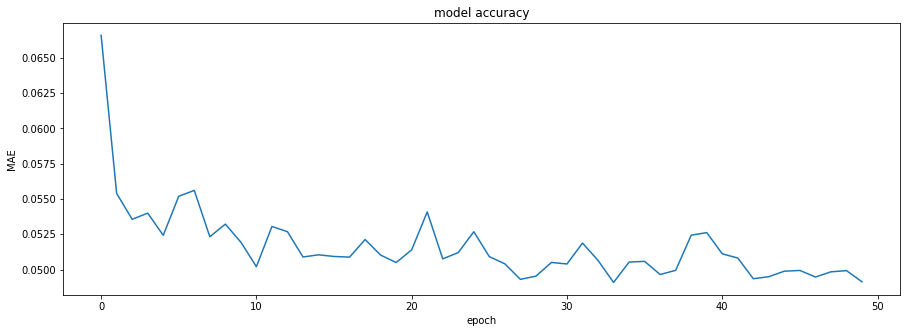

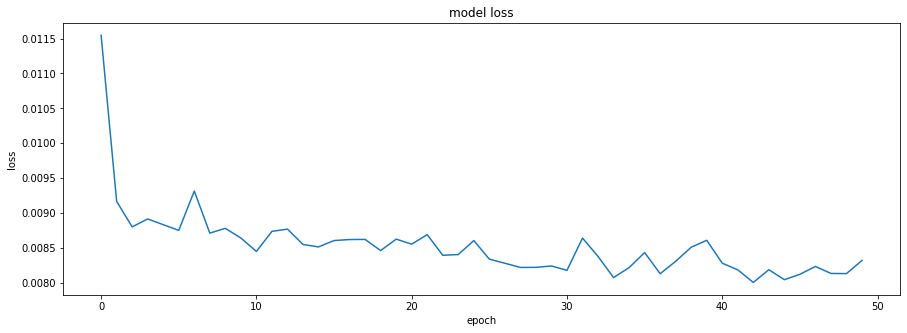

In [11]:
import keras
from keras.models import Sequential
from keras.callbacks import ModelCheckpoint, TensorBoard, ReduceLROnPlateau
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization, LSTM
from keras import regularizers, optimizers
from keras.optimizers import SGD, Adam, RMSprop

#Start Neural Network
def lstm_model():
  print('Building model...')
  input_shape = (features_set.shape[1], 1)
  model = Sequential()
  #lstm 1st layer
  model.add(LSTM(units=50, return_sequences=True, input_shape=input_shape))
  model.add(Dropout(0.2))

  #lstm 2nd layer
  model.add(LSTM(units=50, return_sequences=True))
  model.add(Dropout(0.2))
  
  #lstm 3rd layer
  model.add(LSTM(units=50, return_sequences=True))
  model.add(Dropout(0.2))

  #lstm 4th layer
  model.add(LSTM(units=50))
  model.add(Dropout(0.2))
  
  #Final layer
  model.add(Dense(units = 1))
  
  #Model Compilation
  model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['mae'])
  print(model.summary())
  return model

EPOCH_COUNT = 50

def train_model(features_set, labels):
  model = lstm_model()
  #checkpoint_callback = ModelCheckpoint('./Code/lstm1.h5', monitor='val_mae', verbose=1,save_best_only=True, mode='min')
  #reducelr_callback = ReduceLROnPlateau(monitor='val_mae', factor=0.5, patience=5, min_delta=0.01,verbose=1)
  #callbacks_list = [checkpoint_callback, reducelr_callback]
	# Fit the model and get training history.
  print('Training...')
  history = model.fit(features_set, labels, 
                      epochs = EPOCH_COUNT, 
                      batch_size = 30)
  return model, history

def show_summary_stats(history):
  # List all data in history
  print(history.history.keys())
  # Summarize history for accuracy
  plt.figure(figsize=(15,5))
  plt.plot(history.history['mean_absolute_error'])
  #plt.plot(history.history['val_acc'])
  plt.title('model accuracy')
  plt.ylabel('MAE')
  plt.xlabel('epoch')
  #plt.legend(['train', 'test'], loc='upper left')
  plt.show()

  # Summarize history for loss
  plt.figure(figsize=(15,5))
  plt.plot(history.history['loss'])
  #plt.plot(history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  #plt.legend(['train', 'test'], loc='upper left')
  plt.show()

model, history  = train_model(features_set, labels)
show_summary_stats(history)

In [12]:
y_pred_seg1 = model.predict(test_features)
y_pred_seg1 = scaler.inverse_transform(y_pred_seg1)

test_segment1['case_count'] = y_pred_seg1
test_segment1['segment'] = 1
test_segment1['case_count'] = test_segment1['case_count'].round(0)
test_segment1 = test_segment1[['id', 'application_date', 'segment', 'case_count']]
test_segment1.head()

,id,application_date,segment,case_count
0,1,2019-07-06,1,2955.00
1,2,2019-07-07,1,2959.00
2,3,2019-07-08,1,2966.00
3,4,2019-07-09,1,2975.00
4,5,2019-07-10,1,2986.00


## **Machine Learning - Segment 2**

### **Data Preprocessing**

In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0, 1))

Train_seg2_scaled = scaler.fit_transform(train_v2_segment2[['case_count']])

features_set = []
labels = []
for i in range(93, 844):
    features_set.append(Train_seg2_scaled[i-93:i, 0])
    labels.append(Train_seg2_scaled[i, 0])

features_set, labels = np.array(features_set), np.array(labels)
features_set = np.reshape(features_set, (features_set.shape[0], features_set.shape[1], 1))

print("Shape of feature_set :", features_set.shape)
print("Shape of labels :", labels.shape)

total_series_segment = train_v2_segment2['case_count']
Test_seg2 = train_v2_segment2[['case_count']].tail(93)
test_inputs = total_series_segment[len(total_series_segment) - len(Test_seg2) - 93:].values

test_inputs = test_inputs.reshape(-1,1)
test_inputs = scaler.transform(test_inputs)
test_features = []
for i in range(93, 186):
    test_features.append(test_inputs[i-93:i, 0])

test_features = np.array(test_features)
test_features = np.reshape(test_features, (test_features.shape[0], test_features.shape[1], 1))

print("Shape of feature_set :", test_features.shape)

Shape of feature_set : (751, 93, 1)
Shape of labels : (751,)
Shape of feature_set : (93, 93, 1)


### **Deep Learning**

Building model...
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_5 (LSTM)                (None, 93, 50)            10400     
_________________________________________________________________
dropout_5 (Dropout)          (None, 93, 50)            0         
_________________________________________________________________
lstm_6 (LSTM)                (None, 93, 50)            20200     
_________________________________________________________________
dropout_6 (Dropout)          (None, 93, 50)            0         
_________________________________________________________________
lstm_7 (LSTM)                (None, 93, 50)            20200     
_________________________________________________________________
dropout_7 (Dropout)          (None, 93, 50)            0         
_________________________________________________________________
lstm_8 (LSTM)                (None, 

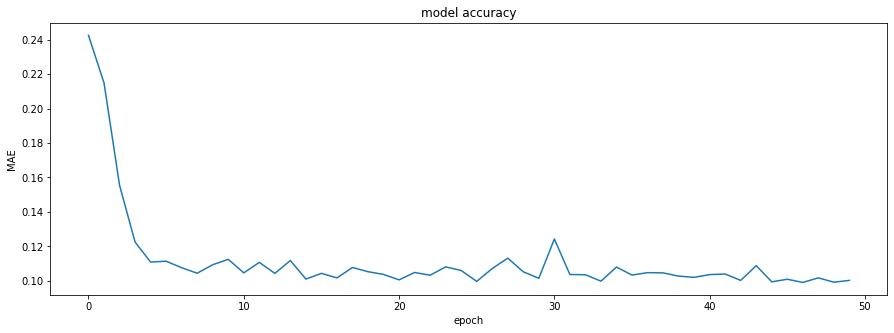

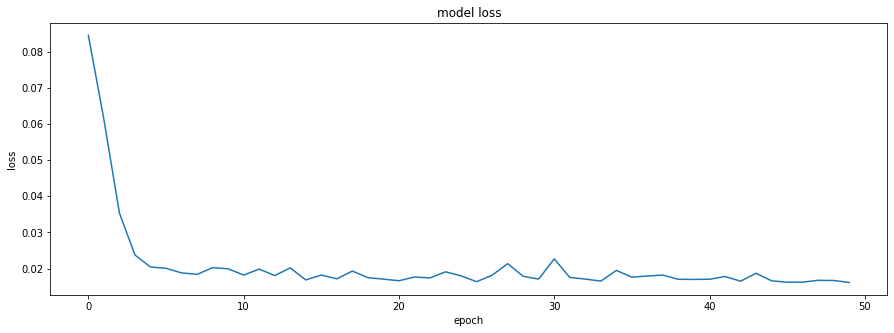

In [15]:
import keras
from keras.models import Sequential
from keras.callbacks import ModelCheckpoint, TensorBoard, ReduceLROnPlateau
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization, LSTM
from keras import regularizers, optimizers
from keras.optimizers import SGD, Adam, RMSprop

#Start Neural Network
def lstm_model():
  print('Building model...')
  input_shape = (features_set.shape[1], 1)
  model = Sequential()
  #lstm 1st layer
  model.add(LSTM(units=50, return_sequences=True, input_shape=input_shape))
  model.add(Dropout(0.2))

  #lstm 2nd layer
  model.add(LSTM(units=50, return_sequences=True))
  model.add(Dropout(0.2))
  
  #lstm 3rd layer
  model.add(LSTM(units=50, return_sequences=True))
  model.add(Dropout(0.2))

  #lstm 4th layer
  model.add(LSTM(units=50))
  model.add(Dropout(0.2))
  
  #Final layer
  model.add(Dense(units = 1))
  
  #Model Compilation
  model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['mae'])
  print(model.summary())
  return model

EPOCH_COUNT = 50

def train_model(features_set, labels):
  model = lstm_model()
  #checkpoint_callback = ModelCheckpoint('./Code/lstm1.h5', monitor='val_mae', verbose=1,save_best_only=True, mode='min')
  #reducelr_callback = ReduceLROnPlateau(monitor='val_mae', factor=0.5, patience=5, min_delta=0.01,verbose=1)
  #callbacks_list = [checkpoint_callback, reducelr_callback]
	# Fit the model and get training history.
  print('Training...')
  history = model.fit(features_set, labels, 
                      epochs = EPOCH_COUNT, 
                      batch_size = 30)
  return model, history

def show_summary_stats(history):
  # List all data in history
  print(history.history.keys())
  # Summarize history for accuracy
  plt.figure(figsize=(15,5))
  plt.plot(history.history['mean_absolute_error'])
  #plt.plot(history.history['val_acc'])
  plt.title('model accuracy')
  plt.ylabel('MAE')
  plt.xlabel('epoch')
  #plt.legend(['train', 'test'], loc='upper left')
  plt.show()

  # Summarize history for loss
  plt.figure(figsize=(15,5))
  plt.plot(history.history['loss'])
  #plt.plot(history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  #plt.legend(['train', 'test'], loc='upper left')
  plt.show()

model, history  = train_model(features_set, labels)
show_summary_stats(history)

In [16]:
y_pred_seg2 = model.predict(test_features)
y_pred_seg2 = scaler.inverse_transform(y_pred_seg2)

test_segment2['case_count'] = y_pred_seg2
test_segment2['segment'] = 2
test_segment2['case_count'] = test_segment2['case_count'].round(0)
test_segment2 = test_segment2[['id', 'application_date', 'segment', 'case_count']]
test_segment2.head()

,id,application_date,segment,case_count
0,88,2019-07-24,2,30837.00
1,89,2019-07-25,2,30004.00
2,90,2019-07-26,2,28797.00
3,91,2019-07-27,2,27256.00
4,92,2019-07-28,2,25431.00


In [0]:
submission = pd.concat([test_segment1, test_segment2],axis = 0)
submission.to_csv("./Output/Submission_lstm_v1.csv", index = False)